# Project 4: Autonomous driving
### Train a Smartcab to Drive

## Overview

A smartcab is a self-driving car from the not-so-distant future that ferries people from one arbitrary location to another. In this project, you will use reinforcement learning to train a smartcab how to drive.

### 1. Environment
Your smartcab operates in an idealized grid-like city, with roads going North-South and East-West. Other vehicles may be present on the roads, but no pedestrians. There is a traffic light at each intersection that can be in one of two states: North-South open or East-West open.

US right-of-way rules apply: On a green light, you can turn left only if there is no oncoming traffic at the intersection coming straight. On a red light, you can turn right if there is no oncoming traffic turning left or traffic from the left going straight.

To understand how to correctly yield to oncoming traffic when turning left, you may refer to this [official drivers education video](https://www.youtube.com/watch?v=TW0Eq2Q-9Ac), or this [passionate exposition](https://www.youtube.com/watch?v=0EdkxI6NeuA).

### 2. Inputs
Assume that a higher-level planner assigns a route to the smartcab, splitting it into waypoints at each intersection. And time in this world is quantized. At any instant, the smartcab is at some intersection. Therefore, the next waypoint is always either one block straight ahead, one block left, one block right, one block back or exactly there (reached the destination).

The smartcab only has an egocentric view of the intersection it is currently at (sorry, no accurate GPS, no global location). It is able to sense whether the traffic light is green for its direction of movement (heading), and whether there is a car at the intersection on each of the incoming roadways (and which direction they are trying to go).

In addition to this, each trip has an associated timer that counts down every time step. If the timer is at 0 and the destination has not been reached, the trip is over, and a new one may start.

### 3. Outputs
At any instant, the smartcab can either stay put at the current intersection, move one block forward, one block left, or one block right (no backward movement).

### 4. Rewards
The smartcab gets a reward for each successfully completed trip. A trip is considered "successfully completed" if the passenger is dropped off at the desired destination (some intersection) within a pre-specified time bound (computed with a route plan).

It also gets a smaller reward for each correct move executed at an intersection. It gets a small penalty for an incorrect move, and a larger penalty for violating traffic rules and/or causing an accident.

### 5. Goal
Design the AI driving agent for the smartcab. It should receive the above-mentioned inputs at each time step t, and generate an output move. Based on the rewards and penalties it gets, the agent should learn an optimal policy for driving on city roads, obeying traffic rules correctly, and trying to reach the destination within a goal time.

### 6. Setup
You need Python 2.7 and pygame for this project: [pygame](https://www.pygame.org/wiki/GettingStarted)

For help with installation, it is best to reach out to the pygame community [help page](http://www.pygame.org/wiki/info), [Google group](https://groups.google.com/forum/#!forum/pygame-mirror-on-google-groups), [reddit](https://www.reddit.com/r/pygame/).

### 7. Download
Download [smartcab](https://github.com/udacity/machine-learning/tree/master/projects/smartcab), unzip and open the template Python file agent.py (do not modify any other file). Perform the following tasks to build your agent, referring to instructions mentioned in README.md as well as inline comments in agent.py.

Also create a project report (e.g. Word or Google doc), and start addressing the questions indicated in italics below. When you have finished the project, save/download the report as a PDF and turn it in with your code.

## Task1

### 1. Implement a basic driving agent
At first these were the approaches that I considered: complete randomness, q-learning, and greedy approach algorithm. Because the q-learning algorithm was the second part of the project I went for the Greedy approach algorithm. Of course algorithms designed to select the best moves (greedy algorithm and q-learning) do better than complete randomness. The agent that uses the greedy approach is called LearningAgent and can be found in the agent.py file.

### 2. Working of naive driving agent
The naive driving agent implements a naive greedy strategy, its main goal is to find and follow a path that maximize the reward:


**1st** Picks a random legal action

**2nd** Checks if this action gives it a good reward or no.


If it gives a bad reward, it picks a random action as its next move. When the reward is good it performs the recently rated action.

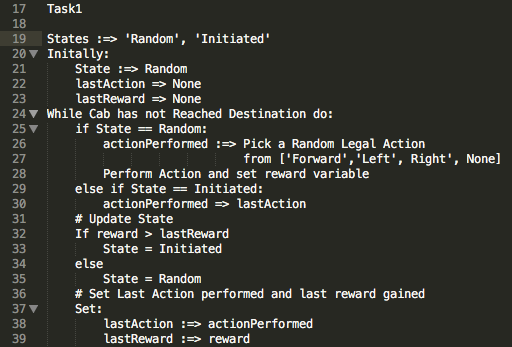

In [1]:
#Pseudocode, Task1:

### 3. How well does it perform?
To test the performance of the agent that implements randomness and the greedy approach I ran 100 trials and put special attention to the time that the cab takes to deliver every passenger to her/his destination. The results can be found in testResultsRandomAgent.

It can be noticed that the agent takes many steps to reach every destination.

From the 100 trials, it reaches its destination on time 28 times. But the cab takes about 90% of the available deadline to reach. Next are the last 10 trials can also found in the file testResultsRandomAgent:

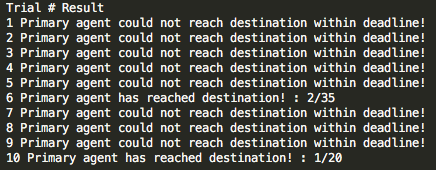

In [2]:
#Last 10 results from testResultsRandomAgent.py:

From these last 10 trials the agent reached the destination two times. The benchmark is around 33/35 steps and then 19/20 steps from the other one, the other one?. These will serve as the benchmark for the QLearning agent.

An important point to notice in a fully random agent is that because everything is fully random there are no significant areas of improvement. We will always get random results: Sometimes the agent performs well and other times it does not. However for the random-and_greedy agent, the algorithm to find the closest way to the destination does a better job. The agent chooses the move that gives the maximum reward. It behaves greedy but at the same time it is random.

## Task2

### 1. Data Preprocessing and Implementation of Q-Learning Agent
Implement the basic driving agent, which processes the following inputs at each time step:

   * Next waypoint location, relative to its current location and heading,
   * Intersection state (traffic light and presence of cars), and,
   * Current deadline value (time steps remaining),

And produces some random move/action (None, 'forward', 'left', 'right'). Don’t try to implement the correct strategy! That’s exactly what your agent is supposed to learn.

Run this agent within the simulation environment with enforce_deadline set to False (see run function in agent.py), and observe how it performs. In this mode, the agent is given unlimited time to reach the destination. The current state, action taken by your agent and reward/penalty earned are shown in the simulator.

In your report, mention what you see in the agent’s behavior. Does it eventually make it to the target location?


Implement the Q-Learning algorithm by initializing and updating a table/mapping of Q-values at each time step. Now, instead of randomly selecting an action, pick the best action available from the current state based on Q-values, and return that.

Each action generates a corresponding numeric reward or penalty (which may be zero). Your agent should take this into account when updating Q-values. Run it again, and observe the behavior.

What changes do you notice in the agent’s behavior?

**Identifying and updating state**

Identify a set of states that you think are appropriate for modeling the driving agent. The main source of state variables are current inputs, but not all of them may be worth representing. Also, you can choose to explicitly define states, or use some combination (vector) of inputs as an implicit state.

At each time step, process the inputs and update the current state. Run it again (and as often as you need) to observe how the reported state changes through the run.

Justify why you picked these set of states, and how they model the agent and its environment.


To implement the QLearning agent the first step was to **DEFINE** the **identified** states of the cab at any point of the journey. Some identified and defined *state variables* are:

    * deadline
    * next_waypoint by the planner
    * traffic light
    * traffic data of oncoming, left, right etc.


These are the MAIN *states variables* that I chose because those best suited the given smartcab code:

    * next waypoint
    * traffic light

Later comes:

    * traffic data of oncoming, left, right etc.

This last one is uncharged of determining the agent's behavior in a more real representation of its journey towards its destination. By a more real representation I mean: the agent is NOT the only car in the streets. One has to take into account that there is traffic. So, it is important to include traffic data oncoming, left, right, etc.

Finally, comes:

    * deadline

The deadline is always important to optimize the results from the learning agent. I put it at the end because to create a simple learning agent the deadline is not essential. The deadline becomes super important only during the  optimization phase. Based on the deadline we might decrease the learning rate which might give a chance to the learning agent to explore a new path.


**Code Analysis**: In my code implementation, *QLearningAgent.py* (specifically referring to **makeState** function in *Line 108*), I only used "light" and "next_waypoint". Then inside **run** function, *Line 111* from the *Agent.py* I enforced the "deadline". I excluded the other states variables because I still have not hyper optimized my learning agent in terms of making it as closest as possible to a real life representation of a smartcab driving in a city/highway/town (many cars sharing the street/road/highway and medium size penalties are paid when the driving regulations are not respected).

Overall, after having adjusted the parameter values of the Q-Learning algorithm, it works pretty good because I have not set up my code to include penalties for right of way or interacting with other cars.

To keep optimizing the learning agent to make it match with the states variables discussion above you should consider to **include "traffic data of oncoming, left, right etc."**, and **then apply penalties for right way or interaction with other cars**.



**Performance**

The two cab state variables that I chose (next waypoint and traffic light) make performance easier. Next waypoint serves as a reference for the algorithm along the cab's journey. Other variables considered before were: destination and current location. But the issues of having had used that instead of next waypoint, as [Rahulvaidran](https://github.com/rahulravindran0108/Smart-cab/tree/master/smartcab) points out, are:


-destination: Destination changes at each interval, therefore encoding it as a state would defeat the purpose and the agent would not be able to learn properly.

-location: This is another variable that should not be used to model the state as it would cause problems due to the sheer size of the grid. This would mean that we will have plenty of states and for the q values to converge, it would definitely take more than 100 trials.


In few words, those variables are not availabe for the cab to sense at any point thus making them void. We care about the moves during the journey of the cab to its destination. Therefore, to model the destination as a form of the state, I went ahead with choosing next waypoint as a state variable.

**Train the cab to perform legal moves**

Apply the reinforcement learning techniques you have learnt, and tweak the parameters (e.g. learning rate, discount factor, action selection method, etc.), to improve the performance of your agent. Your goal is to get it to a point so that within 100 trials, the agent is able to learn a feasible policy - i.e. reach the destination within the allotted time, with net reward remaining positive.

Report what changes you made to your basic implementation of Q-Learning to achieve the final version of the agent. How well does it perform?

Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties?

Using next waypoint as a state variable involves selecting the possible next moves. To do it, we need to know in which directions we are allowed to drive and the state of the traffic light. This is part of training the agent to perform legal moves. One possible improvement for this project is to include the oncoming traffic so that the cab can be trained to perform good in real life conditions.  [California transit norms](https://www.dmv.ca.gov/portal/dmv/detail/pubs/hdbk/driver_handbook_toc). Combining it with deep learning to identify the objects in its way would bring the smartcab closer to behave like an autonomous car.

**Working of the Q-Learning agent**

The QLearning agent implements a Q-Learning strategy. The code can be found in the QLearning.py file.

Basically the agent's behavior relative to other vehicles during the exploration phase (the agent's first 10 journeys) is the following: The agent takes into account traffic data of oncoming, left, right etc, plus the other states variables (including traffic light) and behaves according to the driving regulations from the policies.

During the first 10 journeys, the agent explores new paths. It will choose a random action from all legal actions, else it will choose the action given by the policy.

After the exploration phase, because the chosen learning rate for the learning agent is .85, only 25% of the times the agent will explore a new path.

Here is a quick explanation of the Q-Learning strategy, pseudocode:

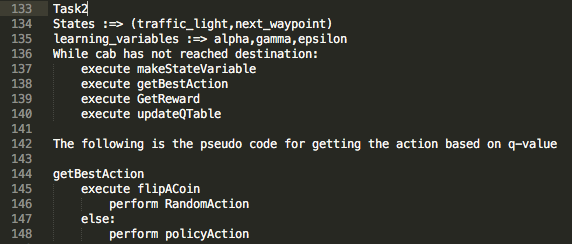

In [3]:
#Pseudocode, Task2:

For every given state the policy action gets the best q-value. The action is performed and the reward is used to update the q-values for the states. After plenty of iteration, we have the true q-values for each state. This helps in training the cab appropriately.

### 2. Evaluation
Your project will be reviewed by a Udacity reviewer against this [rubric](https://review.udacity.com/?_ga=1.255373640.1999700671.1454352564#!/projects/5404058893/rubric). Be sure to review it thoroughly before you submit. All criteria must "meet specificationsEvaluation" in order to pass.

**Test Results for the Q-Learning driving agent**

To find the best values, five models were tried. Half a million trials (500,000) were made per each model:

**Model#1**

    alpha: 0.9
    gamma: 0.0
    Q0: 0.35

**Model#2**

    alpha: 0.85
    gamma: 0.0
    Q0: 0.7

**Model#3**

    alpha: 0.9
    gamma: 0.0
    Q0: 0.35

**Model#4**

    alpha: 0.85
    gamma: 0.0
    Q0: 0.35

**Model#5**

    alpha: 0.85
    gamma: 0.0
    Q0: 0.39


The next table shows the result of every model:

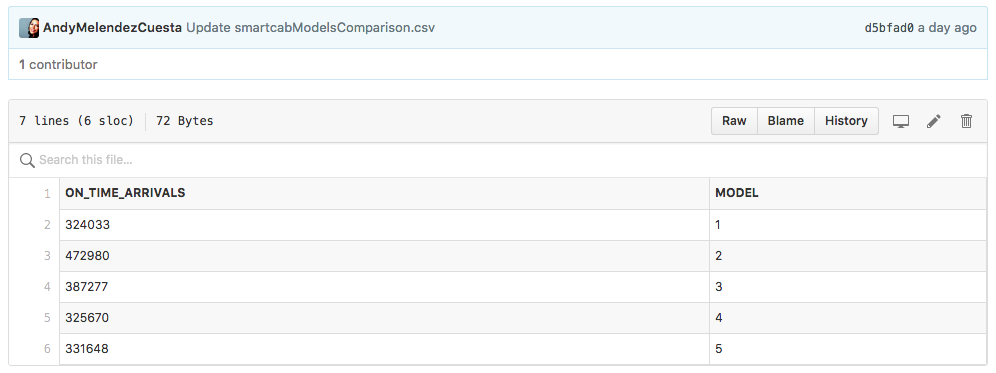

In [4]:
#Models results

As we can see the best model is **Model#2**, as expected according to the already mentioned Machine Learning journal published by the University of Televiv (Israel).

In addition to the previous table, as suggested in the review, some kind of grid search was performed. The code and results can be found in kindaGridSearchModel.py. The file smartcabModelsComparison.csv contains the data used by the grid search code.

The final parameter values **alpha, gamma and epsilon** for my QLearning agent are:


   [Q0](https://en.wikipedia.org/wiki/Q-learning#Initial_conditions_.28Q0.29): Since Q-learning is an iterative algorithm, it implicitly assumes an initial condition before the first update occurs: "The initial Q-value" (Q0). High initial values, also known as "optimistic initial conditions",[5] can encourage exploration: no matter what action is selected, the update rule will cause it to have lower values than the other alternative, thus increasing their choice probability. Recently, it was suggested that the first reward r could be used to reset the initial conditions. According to this idea, the first time an action is taken the reward is used to set the value of Q. This will allow immediate learning in case of fixed deterministic rewards. Surprisingly, this resetting-of-initial-conditions (RIC) approach seems to be consistent with human behaviour in repeated binary choice experiments.[6] In this case the initial Q-value (Q0) was set to a hypothetical value of **20**, which is more than the highest possible positive reward. This lets us use policy decision each iteration without having to do with the problem of exploration or exploitation. Before the changes THE INITIAL Q0 were random.

   [Alpha](https://en.wikipedia.org/wiki/State-Action-Reward-State-Action), the learning rate value was set to **0.85** for a high learning rate. [Learning Rates for Q-learning](http://www.jmlr.org/papers/volume5/evendar03a/evendar03a.pdf). After running 500,000 trials the alpha value (combined with the suggested gamma value) suggested by them maximizes the number of times that the cab reaches its destination on time. **94.596%** of the times the cab reaches its destination on time, **472,980 out of 500,000 trips**. The details are saved in the file *testResults500HundredBestValues.txt*

   [Gamma](http://cssf.usc.edu/History/2011/Projects/S1408.pdf), the weight of future rewards value was set to **0.7** as suggested in the paper from the Machine Learning Televiv University (Israel) research journal. After running 500,000 trials this gamma value (combined with the suggested alpha value) suggested by them maximizes the number of times that the cab reaches its destination on time. **94.596%** of the times the cab reaches its destination on time,  **472,980 out of 500,000 trips**. The details are saved in the file *testResults500HundredBestValues.txt*

**Optimality and the Optimal policy**

Comparing the optimality of  the QLearning agent vs the random-and-greedy agent, out goal is training the agent in two aspects:


* Getting to the destination fairly **quickly**

* Since the agent can take negative reward steps, we would like the agent to reach the destination with a cumulative **positive reward**.


As seen in testResult.txt, our agent's performance shows great improvement. We can see that the cab reaches its destination in less number of steps and its performance keeps improving over the course of the trials. It starts taking the right turns to get to the destination as fast as possible.

Also, the cab always reaches the destination with a large enough cumulative reward. And at the end something interesting happens: the overall rewards are shorter due to the fact that the agent reaches the destination fast.

Because of this, we can say that our agent learns an optimal policy (taking the smallest route without performing many illegal moves during the process of finding the best move) by not only learning to take the right moves (learns from having made the wrong moves).

The agent's performance is consistently great. It does reach the destination easier after every trial. After having ran **500,000** trials it reaches its destiation **94.596%** of the time.

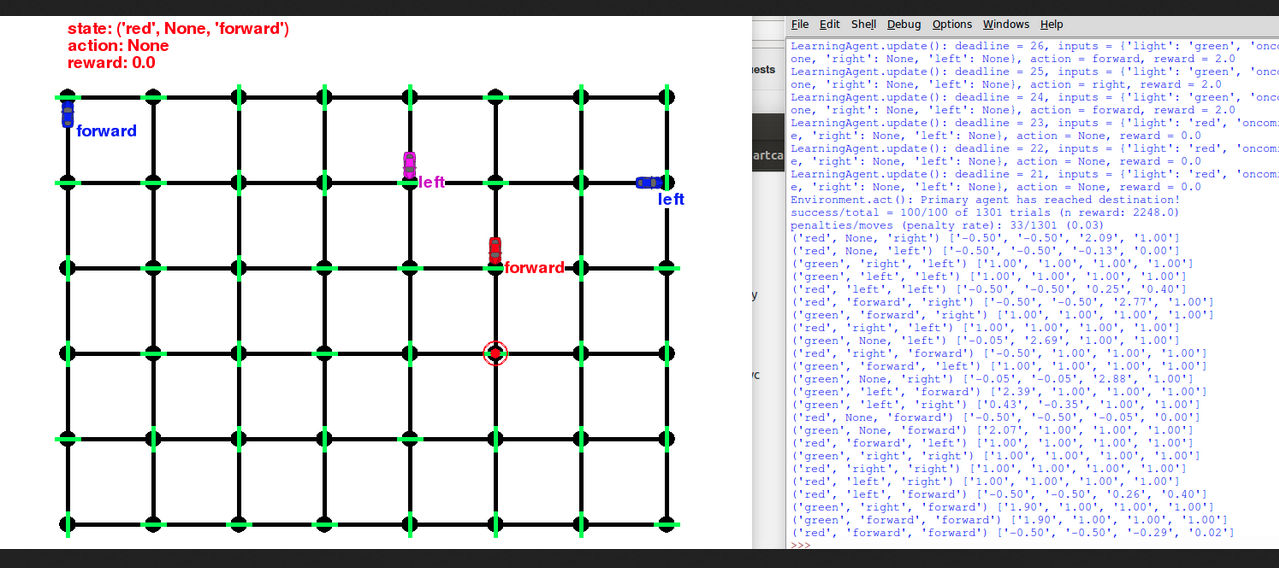

In [5]:
#Smartcab Environment